#  <font color='orange'>Does Product Variety Affect Growth?: A theoretical exploration</font>


|Name|ANR|
|----|-------|
|Mayank Jain|378990|

## Introduction
The Product Variety model was first developed by __[Romer(1990)](https://www.jstor.org/stable/pdf/2937632.pdf?seq=1#page_scan_tab_contents)__. The model posits that economic growth is generated by an expanding variety of products. This is in contrast to the __[Schumpeterian model](https://www.jstor.org/stable/pdf/2951599.pdf?refreqid=excelsior%3A72d689335987cf6b0b22b31cdb58366c&seq=1#page_scan_tab_contents)__, which argues that economic growth is generated not by a horizontal expansion of product variety, but a vertical _Creative Destruction_ whereby old products are made obsolete by new ones. Both schools of thought fall under endogenous growth theory, which argues that economic productivity (and thus economic growth) is determined by forces within the economy itself. 

In the Romer model, endogenous technological change is determined by new product varieties. Each new variety requires a sunk cost of innovation that is incurred once, and never again. This innovation is understood as additions to a list of blueprints where each blueprint describes how to produce a product. 

## Questions
This notebook aims to address the following questions:

-  Can we simulate the Product Variety model, as put forward in __[Romer(1990)](https://www.jstor.org/stable/pdf/2937632.pdf?seq=1#page_scan_tab_contents)__ and [Aghion & Howitt (2009)](http://digamo.free.fr/aghionh9.pdf) using Python?

-  What are the salient differences between the two branches of the model? 

-  What are the implications on economic growth depending on the different assumptions of the two branches?


## Motivation
These questions are motivated by the scant usage of Python for economic modelling and sensitivity analysis (or counterfactual analysis). The following exercise is a modest measure to remedy this deficiency, with the added benefits of transparency and reproducibility that accompany Python as a programming language.  

## 1.  The Two Branches: Explained
We will now examine two branches of the Romer model. The first branch (henceforth "[Model 1](#1.1-Model-1)") assumes final output as the input for R&D, while the second branch (henceforth "[Model 2](#1.2-Model-2)") assumes labour as input for R&D. First, I will explain both models with the help of equations. Then, I will simulate both models and conduct [sensitivity analysis](#4.-Sensitivity-Analysis) to understand the effects both models have on growth. 

### 1.1 Model 1
The model makes a number of assumptions about labour. Namely, that the number of people $\displaystyle L$ is fixed, each individual lives forever and provides a constant flow of one unit of labour, and that labour is supplied inelastically (i.e there is no demand for leisure). People's utility each period depends only on consumption, which is discounted by the rate of time preference $\rho$. Thus, the growth rate $g$ and interest rate $r$ are related by the following Euler equation: 

$$g=\frac{r-\rho}{\epsilon}$$

Final output $Y_t$ is produced under perfect competition using labour and a range of intermediate goods indexed by $i$ in the interval $[0,M_t]$. The production function looks like:
$$Y_t=L^{1-\alpha}\int_0^{M_t} {x_i}^\alpha.d_i\tag{1}$$

where $M_t$ is the measure of product variety and $x_i$ is the amount of intermediate product $i$ used as input for final good production. 

Each unit of an intermediate product is produced using a unit of final goods (a one-for-one relation). To see how product variety becomes the engine of economic growth, let us assume $X_t$ as the total amount of final good used for producing intermediate products. Then, we have:

$$X_t=M_tx$$

Substituting for $x_i$ in the production function, we get:

$$Y_t=M_t^{1-\alpha}L^{1-\alpha}X_t^\alpha \tag{2}$$ 

which is increasing in product variety $M_t$, given factor inputs $L$ and $X_t$, since:

$$\frac{\partial Y_t}{\partial M_t}={(1-\alpha)} \frac{Y_t}{M_t}>0$$

Furthermore, by substituting $X_t=M_tx$ in the equation for GDP –– obtained by subtracting that portion of output that is not used for consumption or investment (i.e intermediate production) –– we get further proof that product variety drives growth in output:

$$GDP=Y_t - X_t$$
$$\therefore GDP=M_tL^{1-\alpha}x^{\alpha}-M_t x$$
$$\therefore GDP=M_t{(L^{1-\alpha}x^{\alpha}-x)} \tag{3}$$

Thus, we see that final-goods production and GDP will be proportional to the degree of product variety in the economy. 

In the intermediate product market, innovation requires a sunk cost (as mentioned [before](#Introduction)). This makes these markets monopolistically competitive, and incentivises innovation with the reward of a positive profit. Thus, monopolists in these markets seek to maximise their flow of profit, measured in units of final good (since final goods are used to produce intermediate goods):

$$\displaystyle\pi_i= \displaystyle p_i x_i - x_i \tag{4}$$

That is, revenue is price $p_i$ times output $x_i$, and cost equals output, given the one-for-one relation between final and intermediate goods. 

Now, under perfect competition, the price of an input is its marginal product. Thus, we obtain $p_i$ by partially differentiating the production function with respect to $p_i$ (since the final-goods market is still perfectly competitive):

$$p_i=\displaystyle\frac{\partial{Y_t}}{\partial{x_i}}=\alpha L^{1-\alpha}{x_i}^{\alpha-1}$$

Plugging this price in the profit function ${(4)}$, we get:

$$\pi_i=\alpha L^{1-\alpha}x_i^{\alpha}-x_i$$

The intermediate monopolist would choose an output that maximises this profit. Thus:

$$\frac{\partial \pi_i}{\partial x_i}={\alpha}^2 L^{1-\alpha} x_i^{\alpha-1} -1=0$$
$$\implies x={(\frac{1}{\alpha^2 L^{1-\alpha}})}^\frac{1}{\alpha-1}={({\alpha}^{-2} L^{\alpha-1})}^\frac{1}{\alpha-1}={\alpha}^{\frac{2}{1-\alpha}}L$$

Thus, in equilibrium, intermediate producers would produce a constant quantity $\displaystyle x=L{\displaystyle \alpha}^{\frac{2}{1-\alpha}}$. Plugging this $x$ back into the profit function will yield the equilibrium profit, which is also a constant: $\pi=\frac{1-\alpha}{\alpha} L{\alpha}^{\frac{2}{1-\alpha}}\tag{5}$

We saw with eq.$(3)$ that GDP growth depends on product variety. This can be expressed by:

$$g=\frac{1}{M_t}\frac{d M_t}{dt}\tag{5.1}$$

which means that growth in GDP is the proportional growth rate of product variety. Product variety, in turn, grows at a rate that depends on the amount $R_t$ of final output used in research, and the parameter $\lambda$, which captures the productivity of the research sector. Thus:

$$\frac{d M_t}{dt}=\lambda{R_t}$$

Assuming that the research sector is perfectly competitive with free entry, the flow of profit in this sector must be zero, giving us the _Research Arbitrage Equation_:

$${(\frac{\pi}{r})}\lambda R_t - R_t=0$$

where the present value of profit flow $\pi$ discounted by the market interest rate $r$ gives us $\displaystyle{(\frac{\pi}{r})}$, the worth of each blueprint to its inventor. For the above profit flow to be zero, we need an $r$ that satisfies the Research Arbitrage Equation. Thus:

$$\frac{\pi}{r}\lambda - 1=0$$
$$\therefore\displaystyle{r=\lambda\pi}$$

which states that the rate of interest must equal the flow of profit an intermediate-output producing entrepreneur can receive per unit invested in research. Substituting this value of $r$ into the Euler equation, we get:

$$g=\frac{\lambda\pi - \rho}{\epsilon}$$

Further substituting the equilibrium profit $(5)$ in the equation above:

$$g =\displaystyle\frac{\lambda\frac{1-\alpha}{\alpha}L{\alpha}^{\frac{2}{1-\alpha}}-\rho}{\epsilon}\tag{6}$$

We thus obtain the equilibrium growth rate of the economy. From this expression, we see that growth is increasing in research productivity($\lambda$) and the size of the economy ($L$), and decreasing in the consumer rate of time preference ($\rho$)



### 1.2 Model 2
We now turn to Model 2, which uses labour as input for R&D. A key difference between this model and Model 1 is that the labour force is assumed to be divided into two parts $L_1$ and $L_2$. The former comprises of workers who produce final goods, while the latter has workers who work in the research sector. $L_1$ and $L_2$ must always add up to $L$:
$$L=L_1+L_2$$

Much of the analytical derivation and exposition of the two models is similar –– the only difference being the subscript of labour. Thus, in the interest of brevity I will only focus on the key equations. Final output is produced using labour and intermediate goods as before:

$$Y_t= L_1^{1-\alpha}\int_{0}^{M_t}x_i^{\alpha}.di\tag{7}$$

Final goods and intermediate goods still maintain a one-for-one relation as each other's inputs. Intermediate monopolists seek to maximise their profit flow and the price of their output is its marginal product in the final goods sector, as before:

$$p_i=\displaystyle\frac{\partial{Y_t}}{\partial{x_i}}=\alpha L_1^{1-\alpha}{x_i}^{\alpha-1}$$

This gives us the profit function $\pi_i=\alpha L^{1-\alpha}x_i^{\alpha}-x_i$ that the intermediate monopolist would want to maximise, again giving us the equilibrium quantity $x=\displaystyle\frac{d\pi_i}{d x_i}=L_1{\alpha}^{\frac{2}{1-\alpha}}$ and profit $\pi=\frac{1-\alpha}{\alpha} L_1{\alpha}^{\frac{2}{1-\alpha}}$

Growth in GDP behaves exactly like the previous model:
$$g=\frac{1}{M_t}.\frac{d M_t}{dt}\tag{8}$$

However, an important difference in this model is that growth in product variety is driven not only by the productivity of the research sector ($\lambda$) and research input ($L_2$), but also by knowledge spillovers:

$$\frac{d M_t}{dt}=\lambda M_t L_2\tag{9}$$

The above expression illustrates that increased growth is driven not only by product variety, but also by research spillovers that allow researchers access to a common, accumulated pool of existing knowledge embodied in $M_t$

Like the previous model, the research sector is assumed to be perfectly competitive. The profit-flow is now:

$$(\frac{\pi}{r})\lambda M_t L_2 - w_t L_2$$

where $w_t$ is the equilibrium wage rate paid to researchers. Equating this expression to zero and solving for $r$ gives us:

$$r=\frac{\lambda M_t \pi}{w_t}$$

Thus, the rate of interest equals the flow of profits ($\pi$ per period) obtained using ($\displaystyle\frac{1}{w_t}$) units of research labor, producing $\displaystyle\frac{\lambda M_t}{w_t}$ units of knowledge (blueprints).

The wage rate is the marginal product of labour in the production function:

$$w_t=\frac{\partial Y_t}{\partial L}=(1-\alpha)L_1^{-\alpha}M_t x^{\alpha}$$

Substituting the equilibrium value of $x$ in the above expression:

$$w_t=(1-\alpha){\alpha}^{\frac{2\alpha}{1-\alpha}}M_t$$

Using the above value of $w_t$ and equilibrium profit, we can rewrite the Research Arbitrage Equation as:

$$r=\lambda M_t*\frac{\frac{1-\alpha}{\alpha}L_1{\alpha}^{\frac{2}{1-\alpha}}}{(1-\alpha){\alpha}^{\frac{2\alpha}{1-\alpha}}M_t}=\lambda M_t*\frac{(1-\alpha)L_1{\alpha}^{\frac{2}{1-\alpha}}}{\alpha(1-\alpha){\alpha}^{\frac{2\alpha}{1-\alpha}}M_t}$$

$$\therefore r=\alpha\lambda L_1\tag{10}$$

Plugging $(9)$ in $(8)$ and solving for $L_1$:

$$L_1=L-\frac{g}{\lambda}$$

Substituting this in $(10)$, we get:

$$r=\alpha(\lambda L-g)$$

Now, plugging this $r$ in the Euler equation, we get the equilibrium rate of growth:

$$g=\frac{\alpha\lambda L-\rho}{\alpha+\epsilon}$$

Once again, we observe that growth is increasing in research productivity ($\lambda$) and the size of the economy ($L$), and decreasing in the consumer rate of time preference ($\rho$)


## 2. Salient differences
- The main difference between the two models is that Model 1 assumes final output as the input going into research, while Model 2 assumes labour as its input for research. This difference can be seen in the two models' production functions and their intermediate producers' equilibrium output and profit, which are all identical except the subscript of labour. 


- The two models also differ in their Research Arbitrage Equations. Flow of profits in the research sectors of both models are taken to be zero, but the cost of production is simply $R_t$ –– the amount of final goods invested –– in Model 1, while the cost is $w_t L_2$ –– the total remuneration paid to researchers –– in Model 2. 


- The third difference in the two models is manifested in the growth rate expressed in terms of its primitive parameters. While both differ analytically in that their equations are different, they both increase (decrease) with an increase (decrease) in research productivity ($\lambda$) and the size of the economy ($L$), and they both decrease (increase) with an increase (decrease) in the consumer rate of time preference ($\rho$). 


- The final difference can be seen in the forces driving product variety in the two models. In Model 1, product variety is only driven by the amount of final goods invested in research ($R_t$) and the productivity of the research sector ($\lambda$). In contrast, product variety in Model 2 is driven not only by research productivity ($\lambda$) and product differentitation ($M_t$) but also by the labour force devoted to research ($L_2$). This signifies that researchers have access to all previously accumulated knowledge (i.e knowledge spillovers). These spillovers are a key factor in the different effects both models have on growth, as we will see in the next section. 

## 3. Simulation
We now simulate the two models over a period of 100 years and analyse their implications on growth. 

  ### 3.1 Model 1
 First, we choose arbitrary values for the primitive parameters $\lambda$, $\alpha$, $\epsilon$ and $\rho$, and calculate $g^\star$ –– the steady-state equilibrium growth rate of the economy. 
 
 

In [31]:
# Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import (HTML, display_html)


In [32]:
# Fixing the parameters and computing L and g
research_prod = 2.0
alpha = np.array([0.3])
epsilon = 2.0
rho = 0.05
L = np.array([1.0])

g = [((research_prod*((1-alpha[0])/alpha[0])*L*alpha[0]**(2/(1-alpha[0]))) - rho)/epsilon]


Then, we fix $L_t$ and $M_t$ equal to 1. Using the fact that $\frac{dm}{dt}=M_t g^\star$ (from eq. 5.1), we generate future values of $M_t$ by adding $\frac{dm}{dt}$ (in other words, the change in $M_t$) to the previous year's $M_t$. Thus, for each year $n$ (where $n\geq2$), we code the following mathematical expression:

$$M_{tn}=M_{t(n-1)}+(M_{t(n-1)})g^\star=M_{t(n-1)}(1+g^\star)$$

In [33]:
# Computing equilibrium intermediate output and profit
M_t = [1.0]
L_t = np.array([1.0])
x_star = np.array(L[0]*(alpha[0]**(2/1-alpha[0])))   
pi = np.array(((1-alpha[0])/alpha[0])*L[0]*(alpha[0]**(2/(1-alpha[0]))))

# Coding the mathematical expression for generating produc variety 
M_t = [1.0]

for n in range(1,100):
    M_t.append(M_t[-1]*(g[0]+1))
    


Using the $M_t$ values thus generated, we calculate $Y_t$, $X_t$ and $GDP$ for each year based on the formulae we saw in section [1.1](#1.1-Model-1). Finally, we compute the percentage change in $Y_t$ for each year, which gives us the steady-state growth in output.
 

In [34]:
# Computing Y(t), X(t) and GDP
x=list(range(1,101))
year = np.asarray(x)
M = np.array(M_t)
Y_t = M*(L_t**(1-alpha))*(x_star**alpha)
X_t = M*x_star
GDP = Y_t - X_t


# Computing percentage change in Y(t)
for i in range(len(Y_t)):
        Y_change = np.array([(((Y_t[i] - Y_t[i-1])/Y_t[i-1])*100)])
        
G_of_Y = np.array(np.repeat(Y_change,100))           

In [35]:
# Table
df = pd.DataFrame({'Y(t)':Y_t, 'M(t)':M,'X(t)':X_t,'GDP':GDP,'Growth of Y':G_of_Y, 'g':g[0]*100}, index=year)
table= df.reindex(columns = ['M(t)', 'Y(t)','X(t)','GDP','g','Growth of Y']).head()
display(HTML(table.to_html(classes='table table-striped')))


,M(t),Y(t),X(t),GDP,g,Growth of Y
1,1.000000,0.541168,0.129153,0.412014,4.982341,4.982341
2,1.049823,0.568130,0.135588,0.432542,4.982341,4.982341
3,1.102129,0.596437,0.142344,0.454093,4.982341,4.982341
4,1.157041,0.626153,0.149436,0.476717,4.982341,4.982341
5,1.214689,0.657350,0.156881,0.500469,4.982341,4.982341


The table above shows the results of the simulation for Model 1. We see that values in the last two columns are identical. This confirms that the growth in simulated output matches the growth we calculated from the primitive parameters in the beginning. The full table can be found in the [Appendix](#Appendix)

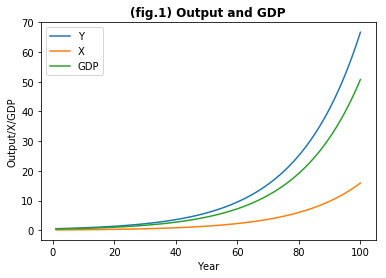

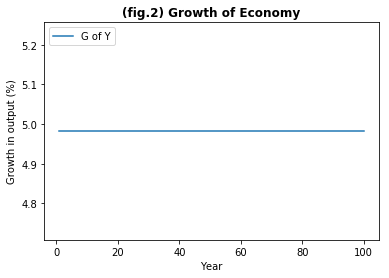

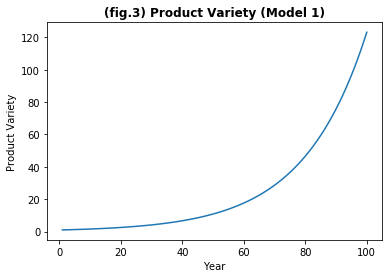

In [36]:
# Graphs   
plt.plot(year, Y_t, label= "Y")
plt.plot(year, X_t, label= "X" )
plt.plot(year, GDP, label = "GDP")
plt.xlabel("Year")
plt.ylabel("Output/X/GDP")
plt.legend(loc = "upper left")
plt.title("(fig.1) Output and GDP", loc = "center", fontweight = "bold")
plt.show()

plt.plot(year, G_of_Y, label = "G of Y")
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Growth in output (%)")
plt.title("(fig.2) Growth of Economy", loc = "center", fontweight = "bold")
plt.show()

plt.plot(year, M_t)
plt.xlabel("Year")
plt.ylabel("Product Variety")
plt.title("(fig.3) Product Variety (Model 1)", loc = "center", fontweight = "bold")
plt.show()
    
    

In fig. 1, we see the dynamic of $Y_t$, $X_t$ and $GDP$. Fig. 2 illustrates that the growth in output maintains its steady-state equilibrium path of approximately 5%, as computed. The Product Variety curve rises gradually in fig. 3 since research is a time-intensive process.  

### 3.2 Model 2

For Model 2, the simulation process is similar. Initially, for the primitive parameters ($\lambda$, $\alpha$, $\epsilon$, $\rho$) we assign the same values as in Model 1 and set $M_t$ for the first year to be $1$. $L_2$ is generated using $g^\star=\lambda L_2$ (from eqs. 8 & 9). This also gives us the value of $L_1$, since $L=L_1 + L_2$. Using $L_2$, the subsequent values of $M_t$ are computed using equation $\frac{dm}{dt}=M_t\lambda L_2$ (from eq. 9). Using this formula, we code the expression:

$$M_{tn}=M_{t(n-1)}+\lambda M_{t(n-1)}L_2=M_{t(n-1)}(1+\lambda L_2)$$

to generate product variety values for each year. 

In [37]:
# Primitive parameters
research_prod_2 = 2.0                 
alpha_2 = np.array([0.3])
epsilon_2 = 2.0
rho_2 = 0.05                       
L = 1.0 

# Computing g and L_2
g_2 = [((alpha_2*research_prod_2*L)-rho_2)/(alpha_2 + epsilon_2)]
L_2 = g_2[0]/research_prod_2

# Computing equilibrium intermediate output and profit
M_t_2 = [1.0]
L_1 = np.array(1-L_2)
x_star_2 = np.array([L_1*alpha_2[0]**(2/1-alpha_2[0])])
pi_2 = np.array(((1-alpha_2)/alpha_2)*L_1*(alpha_2**(2/(1-alpha_2))))

# Coding the mathematical expression for product variety
for n in range(1,100):
    M_t_2.append(M_t_2[-1]*(1+(research_prod_2*L_2[0])))
    

Now that we have the value of $M_t$ for all 100 years, we calculate $Y_t$, $X_t$, $GDP$ and growth of output ($Y_t$) for each year just as we did previously, albeit changing the necessary formulae according to the model's equations. 

In [38]:
# Computing Y(t), X(t) and GDP
x=list(range(1,101))
year = np.asarray(x)
M = np.array(M_t_2)
Y_t = M*(L_1**(1-alpha_2))*(x_star_2**alpha_2)
Y_t_new = Y_t[0]
X_t = M*x_star_2
X_t_new = X_t[0]
GDP = Y_t_new - X_t_new

# Computing percentage change in Y(t) 
for i in range(len(Y_t_new)):
        Y_change = np.array([(((Y_t_new[i] - Y_t_new[i-1])/Y_t_new[i-1])*100)])


G_of_Y = np.array(np.repeat(Y_change,100)) 

In [39]:
# Table
df = pd.DataFrame({'Y(t)':Y_t_new, 'M(t)':M_t_2,'X(t)':X_t_new,'GDP':GDP,'Growth of Y':G_of_Y, 'g':g_2[0]*100}, index=year)
pd.set_option('display.precision',6)
table= df.reindex(columns = ['M(t)', 'Y(t)','X(t)','GDP','g','Growth of Y']).head()
display(HTML(table.to_html(classes='table table-striped')))


,M(t),Y(t),X(t),GDP,g,Growth of Y
1,1.000000,0.476463,0.113711,0.362752,23.913043,23.913043
2,1.239130,0.590400,0.140903,0.449497,23.913043,23.913043
3,1.535444,0.731582,0.174597,0.556985,23.913043,23.913043
4,1.902616,0.906526,0.216349,0.690177,23.913043,23.913043
5,2.357589,1.123304,0.268084,0.855219,23.913043,23.913043


From the table above (complete table in [Appendix](#Appendix)), we see that our simulation is successful since $g$ matches the growth in output. It is important to note that __with the same primitive parameters, the economy in Model 2 is able to achieve a substantially higher growth rate (23.9%) compared to the economy in Model 1 (4.9%)__. As we discussed [earlier](#1.1-Model-2), growth in Model 2 is driven not only by increasing product variety but also by knowledge spillovers –– allowing access to previously accumulated research, thus driving up growth. 

|Parameter|Model 1|Model 2|     
|---------|-------|-------|     
|$\alpha$|0.3|0.3|         
|$\lambda$|2|2|
|$\epsilon$|2|2|
|$\rho$|0.05|0.05|
|$x^\star$|0.129|0.113|
|$\pi$|0.074|0.065|
|$g$|4.9%|23.9%|

Other variables of interest include the intermediate producer's equilibrium output and profit. In Model 1, these are 0.129 and 0.074 units respectively. In Model 2, these are 0.113 and 0.065 units respectively. Thus, intermediate producers in the second economy make lower profits and produce fewer units of intermediate goods than their counterparts in the first economy. A possible reason behind this observation could be that in the second model, research quality improves due to knowledge spillovers. Better research, when fed into the intermediate sector, requires fewer units of intermediate goods to be produced in order to act as inputs for any given level of final output. Thus, with lower intermediate production and profit, an economy under Model 2 can achieve higher growth.  

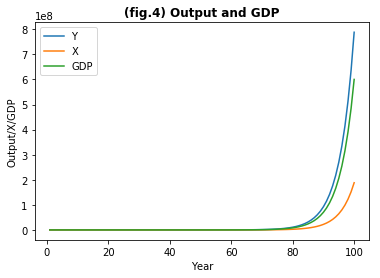

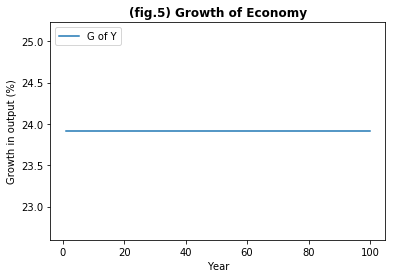

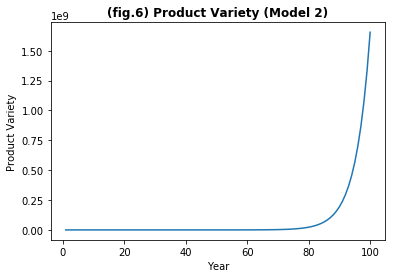

In [40]:
# Graphs
plt.plot(year, Y_t_new, label= "Y")
plt.plot(year, X_t_new, label = "X")
plt.plot(year, GDP, label = "GDP")
plt.xlabel("Year")
plt.ylabel("Output/X/GDP")
plt.legend(loc = "upper left")
plt.title("(fig.4) Output and GDP", loc = "center", fontweight = "bold")
plt.show()

plt.plot(year, G_of_Y, label = "G of Y")
plt.legend(loc="upper left")
plt.xlabel("Year")
plt.ylabel("Growth in output (%)")
plt.title("(fig.5) Growth of Economy", loc = "center", fontweight = "bold")
plt.show()


plt.plot(year, M_t_2)
plt.xlabel("Year")
plt.ylabel("Product Variety")
plt.title("(fig.6) Product Variety (Model 2)", loc = "center", fontweight = "bold")
plt.show() 

Figures 4, 5 and 6 display the same dynamics as figures 1, 2 and 3. The delayed rise of the curves in figures 4 and 6 occurs because the values on the y-axis have been scaled down. 

## 4. Sensitivity Analysis
In the previous section we saw that under the Product Variety model, an economy that uses labour as input for R&D achieves higher growth than an economy that uses final goods as input for R&D, given the same basic parameters governing the economic environment. We now conduct sensitivity analysis by tweaking these parameters to further understand the dynamics of the two models. 

Suppose we change the parameters of the two models in order to match the growth rates of the two economies. 

In [41]:
# Parameters and g
research_prod_2 = 0.55                 #changed from 2.0 to 0.55
alpha_2 = np.array([0.3])
epsilon_2 = 2.0
rho_2 = 0.052                       #changed from 0.05 to 0.052
L = 1.0

g_2 = [((alpha_2*research_prod_2*L)-rho_2)/(alpha_2 + epsilon_2)]
L_2 = g_2[0]/research_prod_2
print(g_2[0][0])

0.04913043478260871


In [section 1.1](#1.1-Model-1) we saw that growth in Model 1 increases with $\lambda$ and decreases with $\rho$. Therefore, to match the second economy's growth to the first's, we need to decrease $\lambda$ and increase $\rho$. After some trial and error, a value of 0.55 for $\lambda$ and 0.052 for $\rho$ brings down the second model's growth rate to 4.913% –– almost identical to the growth rate of the first one (4.982%). 

Using these changed parameters, we now simulate the rest of the model, exactly like we did before. 

In [42]:
# Computing equilibrium intermediate output and profit
M_t_2 = [1.0]
L_1 = np.array(1-L_2)
x_star_2 = np.array([L_1*alpha_2[0]**(2/1-alpha_2[0])])
pi_2 = np.array(((1-alpha_2)/alpha_2)*L_1*(alpha_2**(2/(1-alpha_2))))
print(x_star_2[0][0])
print(pi_2[0])

# Computing product variety values for all years
for n in range(1,100):
    M_t_2.append(M_t_2[-1]*(1+(research_prod_2*L_2[0])))
    
    
# Finding out Y(t), X(t) and GDP
x=list(range(1,101))
year = np.asarray(x)
M = np.array(M_t_2)
Y_t = M*(L_1**(1-alpha_2))*(x_star_2**alpha_2)
Y_t_new = Y_t[0]
X_t = M*x_star_2
X_t_new = X_t[0]
GDP = Y_t_new - X_t_new

# Computing percentage change in Y(t)
for i in range(len(Y_t_new)):
        Y_change = np.array([(((Y_t_new[i] - Y_t_new[i-1])/Y_t_new[i-1])*100)])


G_of_Y = np.array(np.repeat(Y_change,100)) 

# Table
df = pd.DataFrame({'Y(t)':Y_t_new, 'M(t)':M_t_2,'X(t)':X_t_new,'GDP':GDP,'Growth of Y':G_of_Y, 'g':g_2[0]*100}, index=year)
table= df.reindex(columns = ['M(t)', 'Y(t)','X(t)','GDP','g','Growth of Y']).head()
display(HTML(table.to_html(classes='table table-striped')))



0.11761645530306501
0.06813958224561358


,M(t),Y(t),X(t),GDP,g,Growth of Y
1,1.000000,0.492826,0.117616,0.375210,4.913043,4.913043
2,1.049130,0.517039,0.123395,0.393644,4.913043,4.913043
3,1.100675,0.542441,0.129457,0.412984,4.913043,4.913043
4,1.154751,0.569092,0.135818,0.433274,4.913043,4.913043
5,1.211485,0.597051,0.142491,0.454561,4.913043,4.913043


We observe that intermediate producers' equilibrium output and profit flow rise marginally to 0.117 and 0.0681 units respectively, although they still remain below their respective levels in Model 1. This implies that the economy under the second model requires fewer units of intermediate goods and profits to achieve the same level of growth, reinforcing the importance of knowledge spillovers.  

|Parameter|Model 1|Model 2|Model 2 (modified)|     
|---------|-------|-------|------------------|    
|$\alpha$|0.3|0.3|0.3|        
|$\lambda$|2|2|0.55|
|$\epsilon$|2|2|2|
|$\rho$|0.05|0.05|0.052|
|$x^\star$|0.129|0.113|0.117|
|$\pi$|0.074|0.065|0.068|
|$g$|4.9%|23.9%|4.9%|

It is important to note that changing the parameters of the second model to match its growth rate to the first one leads us to parameter values that are slightly unrealistic. For example, a value of 0.55 for research productivity ($\lambda$) is unrealistic for an economy that is similar in all other aspects. 

## Conclusion
By now, we have

- learnt about and simulated the two branches of the Product Variety model
- noted their differences, and
- analysed the different implications each model's assumptions have on growth. Knowledge spillovers in Model 2, which assumes labour as sole input for R&D, emerged as the key driving force behind the superior performance of the economy simulated under that branch. We saw that under the same economic environment, an economy functioning under Model 2 achieves a growth rate many magnitudes higher than an economy under Model 1. Using sensitivity analysis, we confirmed that fewer units of intermediate goods need to be produced if the Model 2 economy were to grow at the same rate as the Model 1 economy. However, this also means lower profits for intermediate producers in Model 2. 

## Appendix

### Full simulation (Model 1)

In [29]:
#Table #Model 1
df = pd.DataFrame({'Y(t)':Y_t, 'M(t)':M,'X(t)':X_t,'GDP':GDP,'Growth of Y':G_of_Y, 'g':g[0]*100}, index=year)
table= df.reindex(columns = ['M(t)', 'Y(t)','X(t)','GDP','g','Growth of Y'])
display(HTML(table.to_html(classes='table table-striped'))) 


,M(t),Y(t),X(t),GDP,g,Growth of Y
1,1.000000,0.541168,0.129153,0.412014,4.982341,4.982341
2,1.049823,0.568130,0.135588,0.432542,4.982341,4.982341
3,1.102129,0.596437,0.142344,0.454093,4.982341,4.982341
4,1.157041,0.626153,0.149436,0.476717,4.982341,4.982341
5,1.214689,0.657350,0.156881,0.500469,4.982341,4.982341
6,1.275209,0.690102,0.164698,0.525404,4.982341,4.982341
7,1.338744,0.724485,0.172903,0.551581,4.982341,4.982341
8,1.405445,0.760581,0.181518,0.579063,4.982341,4.982341
9,1.475469,0.798476,0.190562,0.607914,4.982341,4.982341
10,1.548982,0.838259,0.200056,0.638202,4.982341,4.982341


### Full simulation (Model 2)

In [30]:
#Table #Model 2
df = pd.DataFrame({'Y(t)':Y_t_new, 'M(t)':M_t_2,'X(t)':X_t_new,'GDP':GDP,'Growth of Y':G_of_Y, 'g':g_2[0]*100}, index=year)
pd.set_option('display.precision', 6)
table= df.reindex(columns = ['M(t)', 'Y(t)','X(t)','GDP','g','Growth of Y'])
display(HTML(table.to_html(classes='table table-striped')))


,M(t),Y(t),X(t),GDP,g,Growth of Y
1,1.000000e+00,4.764628e-01,1.137112e-01,0.412014,23.913043,4.982341
2,1.239130e+00,5.903996e-01,1.409030e-01,0.432542,23.913043,4.982341
3,1.535444e+00,7.315821e-01,1.745972e-01,0.454093,23.913043,4.982341
4,1.902616e+00,9.065257e-01,2.163488e-01,0.476717,23.913043,4.982341
5,2.357589e+00,1.123304e+00,2.680843e-01,0.500469,23.913043,4.982341
6,2.921360e+00,1.391920e+00,3.321914e-01,0.525404,23.913043,4.982341
7,3.619946e+00,1.724770e+00,4.116285e-01,0.551581,23.913043,4.982341
8,4.485586e+00,2.137215e+00,5.100614e-01,0.579063,23.913043,4.982341
9,5.558226e+00,2.648288e+00,6.320327e-01,0.607914,23.913043,4.982341
10,6.887367e+00,3.281574e+00,7.831709e-01,0.638202,23.913043,4.982341
